In [1]:
#옵션사항 넣기
%matplotlib nbagg

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt





In [ ]:
# csv file
# battles : 작품에 등장하는 전투관련 data
# deaths : 등장인물의 정보와 사망할 경우 몇년도의 어느 전투에서 사망





In [2]:
battles = pd.read_csv('./data/battles.csv')
deaths =  pd.read_csv('./data/character-deaths.csv')





In [3]:
battles.shape





(38, 25)

In [4]:
battles.columns





Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

In [5]:
battles.head()





,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [6]:
deaths.shape





(917, 13)

In [7]:
deaths.columns





Index(['Name', 'Allegiances', 'Death Year', 'Book of Death', 'Death Chapter',
       'Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
       'DwD'],
      dtype='object')

In [8]:
deaths.head()





,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [11]:
# 소설 기준으로 작품번호에 따른 인물들의 죽음 횟수를 line plot으로 시각화
book_nums_to_death_count = deaths['Book of Death'].value_counts().sort_index()
book_nums_to_death_count





1.0    49
2.0    73
3.0    97
4.0    27
5.0    61
Name: Book of Death, dtype: int64

<IPython.core.display.Javascript object>


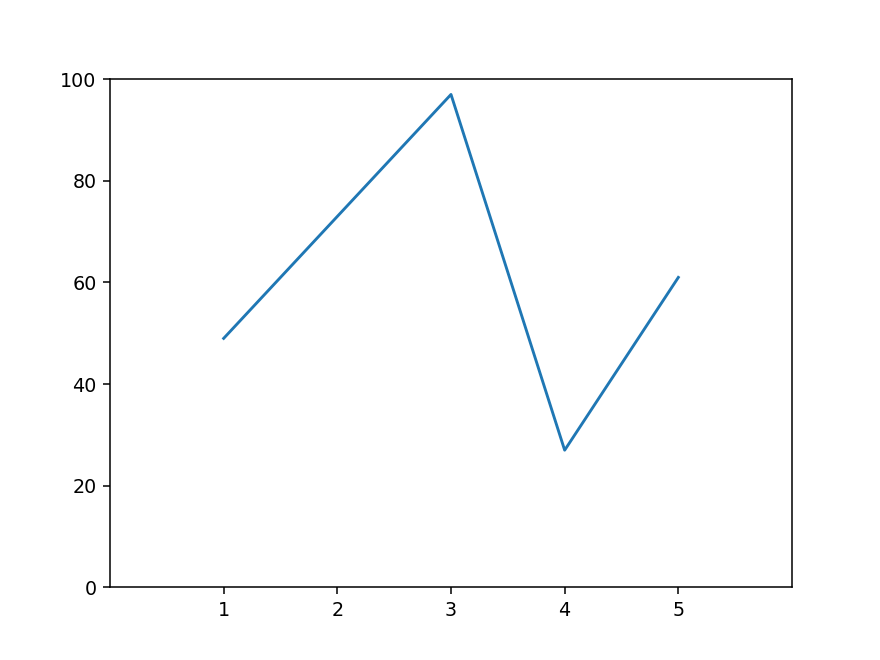

In [19]:
ax1 = book_nums_to_death_count.plot(
)





In [20]:
ax1.set_xticks(np.arange(1,6))





In [21]:
# 간격을 균등하게 배분함
ax1.set_xlim(0,6)





(0, 6)

In [22]:
ax1.set_ylim(0,100)





(0, 100)

In [23]:
# 전투 데이터 분석





In [24]:
battles['year'].head()





0    298
1    298
2    298
3    298
4    298
Name: year, dtype: int64

In [25]:
# name을 index로 바꾸기 - 인덱스를 이름으로 지정
battles = battles.set_index(['name'])





In [27]:
battles.head()





,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
name,,,,,,,,,,,,,,,,,,,,,
Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [28]:
battles['year']





name
Battle of the Golden Tooth                              298
Battle at the Mummer's Ford                             298
Battle of Riverrun                                      298
Battle of the Green Fork                                298
Battle of the Whispering Wood                           298
Battle of the Camps                                     298
Sack of Darry                                           298
Battle of Moat Cailin                                   299
Battle of Deepwood Motte                                299
Battle of the Stony Shore                               299
Battle of Torrhen's Square                              299
Battle of Winterfell                                    299
Sack of Torrhen's Square                                299
Sack of Winterfell                                      299
Battle of Oxcross                                       299
Siege of Storm's End                                    299
Battle of the Fords                

In [ ]:
# 공격군과 수비군 합이 1만명이 넘어가는 전투에 대해 정보 추출





In [30]:
# mask 만들기
large_battles_mask = battles['attacker_size'] + battles['defender_size'] >10000





In [34]:
large_battles = battles.loc[large_battles_mask,['attacker_size','defender_size']]
large_battles.head()





,attacker_size,defender_size
name,,
Battle of the Golden Tooth,15000.0,4000.0
Battle of Riverrun,15000.0,10000.0
Battle of the Green Fork,18000.0,20000.0
Battle of the Camps,6000.0,12625.0
Battle of Oxcross,6000.0,10000.0


<IPython.core.display.Javascript object>


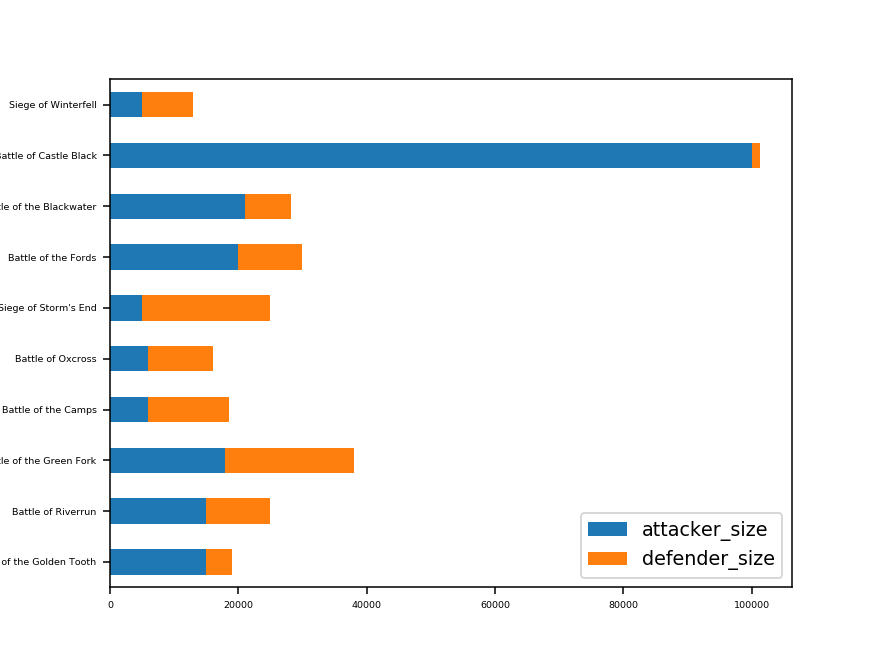

In [37]:
# bar plot 그리기
ax2 = large_battles.plot(kind='barh',stacked=True,fontsize=5)





In [38]:
#  공격군과 수비군의 비율을 통한 분석





In [40]:
large_battles['attacker_pcts'] = large_battles['attacker_size']/(large_battles['attacker_size']+large_battles['defender_size'])





In [42]:
large_battles['defender_pcts'] = large_battles['defender_size']/(large_battles['attacker_size']+large_battles['defender_size'])





In [43]:
large_battles





,attacker_size,defender_size,attacker_pcts,defender_pcts
name,,,,
Battle of the Golden Tooth,15000.0,4000.0,0.789474,0.210526
Battle of Riverrun,15000.0,10000.0,0.600000,0.400000
Battle of the Green Fork,18000.0,20000.0,0.473684,0.526316
Battle of the Camps,6000.0,12625.0,0.322148,0.677852
Battle of Oxcross,6000.0,10000.0,0.375000,0.625000
Siege of Storm's End,5000.0,20000.0,0.200000,0.800000
Battle of the Fords,20000.0,10000.0,0.666667,0.333333
Battle of the Blackwater,21000.0,7250.0,0.743363,0.256637
Battle of Castle Black,100000.0,1240.0,0.987752,0.012248


<IPython.core.display.Javascript object>


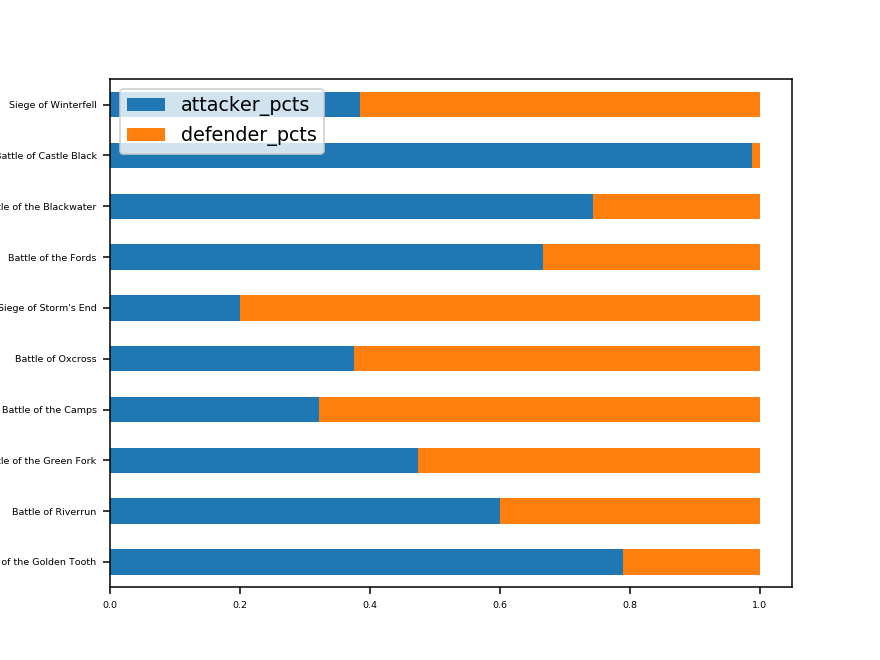

In [44]:
ax2= large_battles[['attacker_pcts','defender_pcts']].plot(kind='barh',stacked=True,fontsize=5)





In [ ]:
# 전체 전투중 각 가문이 몇번이나 전투에 개입하는지!





In [45]:
battles.head()





,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
name,,,,,,,,,,,,,,,,,,,,,
Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [47]:
# 컬럼 발췌하기 
col_names = battles.columns[4:12]
col_names





Index(['attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4'],
      dtype='object')

In [48]:
battles.columns





Index(['year', 'battle_number', 'attacker_king', 'defender_king', 'attacker_1',
       'attacker_2', 'attacker_3', 'attacker_4', 'defender_1', 'defender_2',
       'defender_3', 'defender_4', 'attacker_outcome', 'battle_type',
       'major_death', 'major_capture', 'attacker_size', 'defender_size',
       'attacker_commander', 'defender_commander', 'summer', 'location',
       'region', 'note'],
      dtype='object')

In [50]:
# nan이 있으면 unique함수를 사용하면 에러가 발생하므로 nan을 다른 문자열로 대체 시키자.
battles[col_names].head()





,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4
name,,,,,,,,
Battle of the Golden Tooth,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
Battle at the Mummer's Ford,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN
Battle of Riverrun,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
Battle of the Green Fork,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN
Battle of the Whispering Wood,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN


In [53]:
house_names = battles[col_names].fillna('None').values
house_names





array([['Lannister', 'None', 'None', 'None', 'Tully', 'None', 'None',
        'None'],
       ['Lannister', 'None', 'None', 'None', 'Baratheon', 'None', 'None',
        'None'],
       ['Lannister', 'None', 'None', 'None', 'Tully', 'None', 'None',
        'None'],
       ['Stark', 'None', 'None', 'None', 'Lannister', 'None', 'None',
        'None'],
       ['Stark', 'Tully', 'None', 'None', 'Lannister', 'None', 'None',
        'None'],
       ['Stark', 'Tully', 'None', 'None', 'Lannister', 'None', 'None',
        'None'],
       ['Lannister', 'None', 'None', 'None', 'Darry', 'None', 'None',
        'None'],
       ['Greyjoy', 'None', 'None', 'None', 'Stark', 'None', 'None',
        'None'],
       ['Greyjoy', 'None', 'None', 'None', 'Stark', 'None', 'None',
        'None'],
       ['Greyjoy', 'None', 'None', 'None', 'Stark', 'None', 'None',
        'None'],
       ['Stark', 'None', 'None', 'None', 'Greyjoy', 'None', 'None',
        'None'],
       ['Greyjoy', 'None', 'None', 'None', 'S

In [55]:
# 가문들의 unique한 이름 얻기
house_names = np.unique(house_names)
house_names





array(['Baratheon', 'Blackwood', 'Bolton', 'Bracken', 'Brave Companions',
       'Brotherhood without Banners', 'Darry', 'Free folk', 'Frey',
       'Giants', 'Glover', 'Greyjoy', 'Karstark', 'Lannister',
       'Mallister', 'Mormont', "Night's Watch", 'None', 'Stark', 'Thenns',
       'Tully', 'Tyrell'], dtype=object)

In [60]:
# house_name 에서 none을 제거하기
house_names = house_names[house_names != 'None']





In [61]:
# 위와 같이 정의한 array를 Series로 만들기 - 가문마다 카운트를 넣으려고 만든 그릇!
house_to_battle_count = pd.Series(0,index = house_names)
house_to_battle_count





Baratheon                      0
Blackwood                      0
Bolton                         0
Bracken                        0
Brave Companions               0
Brotherhood without Banners    0
Darry                          0
Free folk                      0
Frey                           0
Giants                         0
Glover                         0
Greyjoy                        0
Karstark                       0
Lannister                      0
Mallister                      0
Mormont                        0
Night's Watch                  0
Stark                          0
Thenns                         0
Tully                          0
Tyrell                         0
dtype: int64

In [62]:
# fill_value 는 nan 값을 만나면 0을 찍는다.
for col in col_names:
    house_to_battle_count =  house_to_battle_count.add(battles[col].value_counts(),fill_value=0)





In [63]:
house_to_battle_count





Baratheon                      11.0
Blackwood                       1.0
Bolton                          4.0
Bracken                         1.0
Brave Companions                3.0
Brotherhood without Banners     1.0
Darry                           2.0
Free folk                       1.0
Frey                            4.0
Giants                          1.0
Glover                          2.0
Greyjoy                        11.0
Karstark                        2.0
Lannister                      18.0
Mallister                       1.0
Mormont                         2.0
Night's Watch                   1.0
Stark                          16.0
Thenns                          1.0
Tully                           7.0
Tyrell                          2.0
dtype: float64